# **Predicting tweet sentiment**

Dataset from https://www.kaggle.com/datasets/bhavikjikadara/tweets-dataset

**Context**

This is the sentiment140 dataset. It contains 1,600,000 tweets extracted using the Twitter API. The tweets have been annotated (0 = negative, 4 = positive) and can be used to detect sentiment.

**Content**

It contains the following 6 fields:

* target: the polarity of the tweet (0 = negative and 4 = positive)
* ids: The id of the tweet ( 2087)
* date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
* flag: The query (lyx). If there is no query, then this value is NO_QUERY.
* user: the user that tweeted.
* text: the text of the tweet.

## **1. Exploratory Data Analysis** 

In [33]:
# import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


# text processing libraries
import re
import contractions

from collections import Counter
# import string
import nltk
# import warnings
# %matplotlib inline
# warnings.filterwarnings("ignore")
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\macie\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\macie\AppData\Roaming\nltk_data...


Pandas and Numpy have been used for data manipulation and numerical calculations

Matplotlib and Seaborn have been used for data visualizations

In [ ]:
# import data   
tweets = pd.read_csv("..//data//tweets.csv", encoding="latin-1")

In [ ]:
# check the shape of the dataframe
print("Shape of the dataframe:", tweets.shape)

In [ ]:
# display the first few rows of the dataframe
tweets.head()

In [ ]:
# display the last few rows of the dataframe
tweets.tail()

In [ ]:
# display information about data
tweets.info()

In [ ]:
# check for duplication
tweets.nunique()

In [ ]:
# check for missing values
tweets.isnull().sum()

In [ ]:
# summary statistics of numerical columns
tweets.describe()

**Data reduction**

Some columns or variables can be dropped if they do not add value to our analysis

In our dataset, columns ID, Date, flag, User don’t have any predictive power to predict the dependent variable

In [ ]:
data = tweets.drop(['ID', 'Date', 'flag', 'User'], axis = 'columns')
data

**Data cleaning**

Some names of the variables are not relevant and not easy to understand

Some data may have data entry errors, and some variables may need data type conversion. We need to fix this issue in the data

In [ ]:
# adjusting target values
data['Target'] = data['Target'].replace(4, 1)
data

In [ ]:
# removing unnecessary user tags
data['Text'] = data['Text'].replace(r"@\w+", "", regex=True)
data


In [ ]:
# resolving contractions (and slang)
data['Text'] = data['Text'].apply(lambda x: contractions.fix(x))
data

In [ ]:
# removing punctuation marks
data['Text'] = data['Text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
data


In [ ]:
# lowercasing letters in the text
data['Text'] = data['Text'].str.lower()
data


**Visualization**

In [ ]:
# visualize class distribution
plt.figure(figsize=(5, 5))
sns.countplot(x = 'Target' , data = data)
plt.title('Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
# explore tweet length
data['characters'] = data['Text'].apply(lambda x: len(x))

# visualize tweet length distribution
plt.figure(figsize = (10, 6))
sns.histplot(data['characters'], bins = 60)
plt.title('Distribution of tweet length')
plt.xlabel('Number of characters')
plt.ylabel('Count')
plt.show()

In [ ]:
# explore tweet length
data['words'] = data['Text'].apply(lambda x: len(x.split()))

# visualize tweet length distribution
plt.figure(figsize = (10, 6))
sns.histplot(data['words'], bins = 30)
plt.title('Distribution of tweet length')
plt.xlabel('Number of words')
plt.ylabel('Count')
plt.show()

In [ ]:

# combine all the text into a single string
all_text = ' '.join(data['Text'])

# split the text into individual words
words = all_text.split()

# count the frequency of each word
word_counts = Counter(words)

# get the top 10 most common words
top_10_words = word_counts.most_common(10)

# extract the words and their counts
top_10_words, top_10_counts = zip(*top_10_words)

# plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_words, top_10_counts)
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()


In [ ]:
# average word count depending on sentiment

df = data.groupby("Target").words.agg("mean")

df.plot(kind = 'bar', color = 'blue')

plt.title('Average word count depending on sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average word count')
plt.xticks(rotation = 0)  
plt.show()

In [ ]:
# is # in tweet?

data['has_hashtag'] = tweets['Text'].str.contains(r'#\w+')
data

In [ ]:
# is hashtag present in negatives tweets?

data[data['Target'] == 0]['has_hashtag'].value_counts().apply(lambda x: x / len(data[data['Target'] == 0]) * 100)


In [ ]:
# is hashtag present in positives tweets?

data[data['Target'] == 1]['has_hashtag'].value_counts().apply(lambda x: x / len(data[data['Target'] == 1]) * 100)

In [ ]:
# is "not" in tweet?

data['has_not'] = data['Text'].str.contains('not')
data

In [ ]:
# is "not" present in negatives tweets?

data[data['Target'] == 0]['has_not'].value_counts().apply(lambda x: x / len(data[data['Target'] == 0]) * 100)

In [ ]:
# is "not" present in positives tweets?

data[data['Target'] == 1]['has_not'].value_counts().apply(lambda x: x / len(data[data['Target'] == 1]) * 100)

In [ ]:
# extract hour from the Date column

data['Hour'] = pd.to_datetime(tweets['Date']).dt.hour
data


In [ ]:
# visualize the distribution of tweets over the day

plt.figure(figsize=(10, 6))
sns.countplot(x = 'Hour', data = data, color = 'blue')
plt.title('Distribution of tweets over the day')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()


In [ ]:
# visualize the the influence of the hour of writing a tweet on the Target variable
hourly_target_counts = data.groupby('Hour')['Target'].value_counts().unstack(fill_value=0)
plt.figure(figsize=(15, 6))
hourly_target_counts.plot(kind='bar', stacked=True)

plt.title('The influence of the hour of writing a tweet on the sentiment')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(rotation = 0)  

plt.show()

In [ ]:
# deleting words which have less characters than 3

data['clean_text'] = data["Text"].apply(lambda x: " ".join([w for w in x.split() if len(w)>=3]))
data

In [37]:
# individual words considered as tokens

tokenized_tweet = data['clean_text'].apply(lambda x: x.split())
tokenized_tweet

0          [upset, that, cannot, update, his, facebook, t...
1          [dived, many, times, for, the, ball, managed, ...
2          [whole, body, feels, itchy, and, like, its, fire]
3          [not, behaving, all, mad, why, here, because, ...
4                                    [not, the, whole, crew]
                                 ...                        
1048570                 [grandma, making, dinenr, with, mum]
1048571    [midmorning, snack, time, bowl, cheese, noodle...
1048572    [same, here, say, like, from, the, terminiator...
1048573                               [great, thaanks, wbuu]
1048574        [cannot, wait, til, her, date, this, weekend]
Name: clean_text, Length: 1048575, dtype: object

In [44]:
# stem the words
#stemmer = PorterStemmer()

#tokenized_tweet = tokenized_tweet.apply(lambda s: [stemmer.stem(word) for word in s]) # stemming
#tokenized_tweet
# Initialize wordnet lemmatizer only on verbs - makes the biggest sense
wnl = WordNetLemmatizer()
tokenized_tweet = tokenized_tweet.apply(lambda s: [wnl.lemmatize(word, pos="v") for word in s]) # lemmatization

In [46]:
tokenized_tweet.iloc[34]

['sick',
 'and',
 'spend',
 'hour',
 'sit',
 'the',
 'shower',
 'because',
 'wa',
 'too',
 'sick',
 'stand',
 'and',
 'hold',
 'back',
 'the',
 'puke',
 'like',
 'champ',
 'bed',
 'now']

In [47]:
# combining to sentences
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
data['clean_text'] = tokenized_tweet
data

,Target,Text,characters,words,has_hashtag,has_not,clean_text
0,0,is upset that he cannot update his facebook by...,107,21,False,True,upset that cannot update his facebook texting ...
1,0,i dived many times for the ball managed to sa...,78,17,False,False,dive many time for the ball manage save the re...
2,0,my whole body feels itchy and like its on fire,47,10,False,False,whole body feel itchy and like it fire
3,0,no it is not behaving at all i am mad why am ...,93,22,False,True,not behave all mad why here because cannot see...
4,0,not the whole crew,20,4,False,True,not the whole crew
...,...,...,...,...,...,...,...
1048570,1,my grandma is making dinenr with my mum,40,8,False,False,grandma make dinenr with mum
1048571,1,midmorning snack time a bowl of cheese noodles...,51,9,False,False,midmorning snack time bowl cheese noodle yum
1048572,1,same here say it like from the terminiator m...,81,16,False,False,same here say like from the terminiator movie ...
1048573,1,i am great thaanks wbuu,25,5,False,False,great thaanks wbuu


C:\Users\macie\AppData\Local\Temp\ipykernel_22800\208684624.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


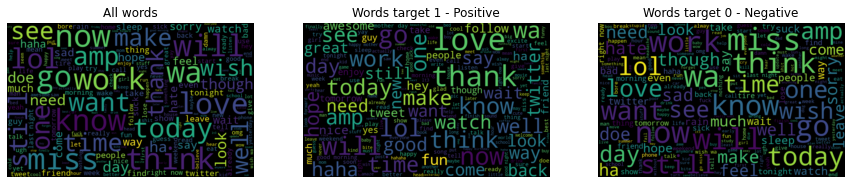

In [49]:
all_words = ' '.join([text for text in data['clean_text']])
all_words_pos = ' '.join([text for text in data['clean_text'][data['Target'] == 1]])
all_words_neg = ' '.join([text for text in data['clean_text'][data['Target'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)
wordcloud_pos = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words_pos)
wordcloud_neg = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words_neg)

# plot the graph

fig, ax = plt.subplots(1, 3, figsize=(15, 10))
ax[0].imshow(wordcloud, interpolation="bilinear")
ax[0].set_title('All words')
ax[0].axis('off')
ax[1].imshow(wordcloud_pos, interpolation="bilinear")
ax[1].set_title('Words target 1 - Positive')
ax[1].axis('off')
ax[2].imshow(wordcloud_neg, interpolation="bilinear")
ax[2].set_title('Words target 0 - Negative')
ax[2].axis('off')
fig.show()

In [50]:
def hashtag_extract(tweets):
    hashtags = []
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [51]:
# extracting hashtags from positive tweets
ht_positive = hashtag_extract(tweets['Text'][data['Target'] == 1])

# extracting hashtags from negative tweets
ht_negative = hashtag_extract(tweets['Text'][data['Target'] == 0])

In [52]:
# unnest list 
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [53]:
ht_positive[:5]

['Devunity', 'Alexa', 'Japan', 'Skype', 'expletives']

In [54]:
ht_negative[:5]

['itm', 'therapyfail', 'fb', 'TTSC', '24']

In [55]:
# converting dictionary to dataframe
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()), 
                  'Count': list(freq.values())
                  })
d.sort_values(by='Count', ascending=False)

,Hashtag,Count
90,followfriday,829
68,fb,177
201,FollowFriday,168
1847,delongeday,161
211,asot400,151
...,...,...
1270,python,1
1271,jcdecaux,1
1273,12seconds,1
1274,com125,1


Text(0.5, 1.0, 'Top 10 most frequent hashtags in positive tweets')

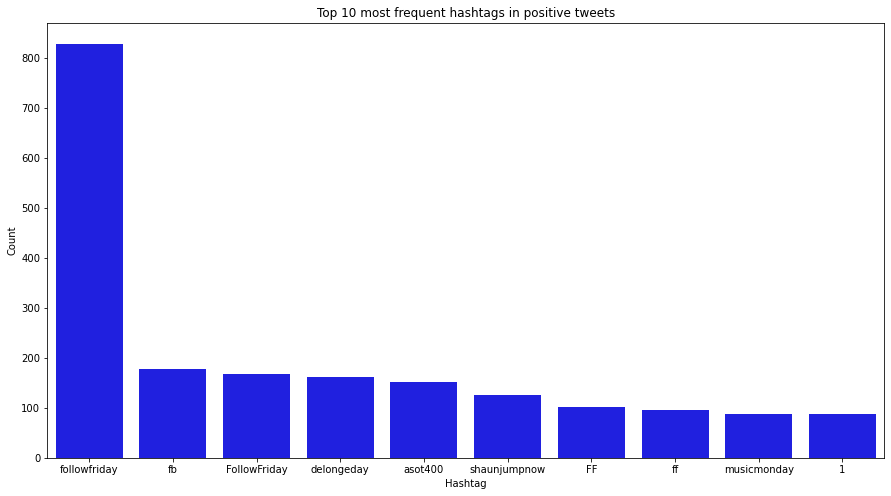

In [57]:
# selecting top 10 most frequent hashtags positive
d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(15,8))
sns.barplot(data=d, x= "Hashtag", y = "Count", color="blue")
plt.title('Top 10 most frequent hashtags in positive tweets')

In [58]:
# converting dictionary to dataframe
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()), 
                  'Count': list(freq.values())
                  })
d.sort_values(by='Count', ascending=False)

,Hashtag,Count
2,fb,1037
4246,squarespace,628
4333,iranelection,315
12,fail,278
17,1,191
...,...,...
2919,NHL10,1
2918,NBA10,1
2917,Fifa10,1
2916,WSOP4,1


Text(0.5, 1.0, 'Top 10 most frequent hashtags in negative tweets')

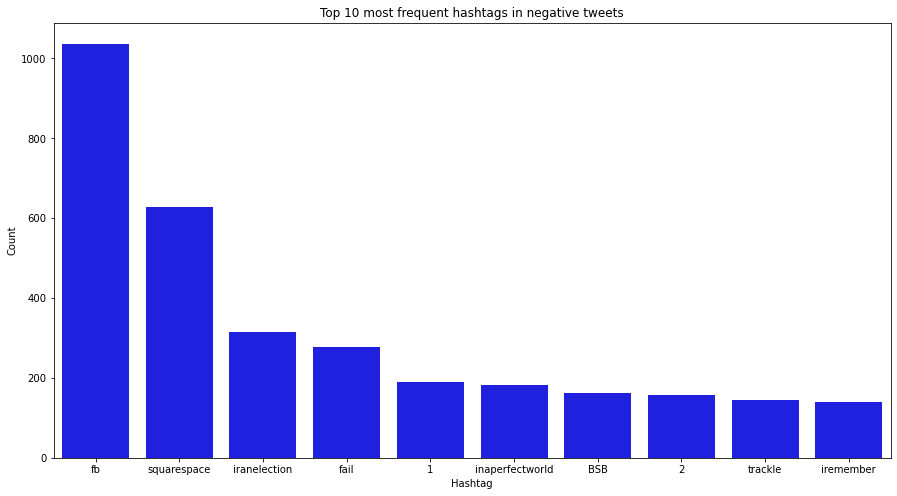

In [59]:
# selecting top 10 most frequent hashtags negative
d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(15,8))
sns.barplot(data=d, x= "Hashtag", y = "Count", color="blue")
plt.title('Top 10 most frequent hashtags in negative tweets')

## **2. Feature engineering** 

## **3. Preparation of training and test sets**

In [ ]:

clean_data = data[['Text', 'Target']] 
clean_data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    clean_data[clean_data.columns.values[:-1]], # X
    clean_data[clean_data.columns.values[-1]], # y
    test_size=0.33, random_state=42)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

## **4. Modeling and validation**